In [1]:
!pip install tensorflow

In [2]:
import numpy as np
import pickle as pickle
import pandas as pd
import math

import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.preprocessing import normalize

import os
import time
import tensorflow as tf
from tensorflow import keras

from keras.utils import to_categorical

from keras.models import Sequential
from keras.models import load_model

from keras.layers import Conv1D, MaxPooling1D
from keras.layers import BatchNormalization, Activation, Dropout, Flatten, Dense

from keras.layers import Bidirectional, TimeDistributed
from keras.layers import LSTM, GRU, SimpleRNN

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from keras.regularizers import l2

from sklearn.metrics import confusion_matrix, classification_report

In [3]:
with open('/content/drive/MyDrive/DEAP/x_train.npy', 'rb') as file:
    x_train = np.load(file, allow_pickle=True)
with open('/content/drive/MyDrive/DEAP/y_train.npy', 'rb') as file:
    y_train = np.load(file, allow_pickle=True)
with open('/content/drive/MyDrive/DEAP/x_val.npy', 'rb') as file:
    x_val = np.load(file, allow_pickle=True)
with open('/content/drive/MyDrive/DEAP/y_val.npy', 'rb') as file:
    y_val = np.load(file, allow_pickle=True)
with open('/content/drive/MyDrive/DEAP/x_test.npy', 'rb') as file:
    x_test = np.load(file, allow_pickle=True)
with open('/content/drive/MyDrive/DEAP/y_test.npy', 'rb') as file:
    y_test = np.load(file, allow_pickle=True)

In [4]:
import random
import os

# Set the random seed for reproducibility
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)

In [5]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)

(31744, 37, 256)
(31744, 4)
(3968, 37, 256)
(3968, 4)
(3968, 37, 256)
(3968, 4)


In [6]:
scaler = StandardScaler()

In [7]:
num_samples1, channels1, data_points1 = x_train.shape
x_train = x_train.reshape(num_samples1, -1)  # Flatten the data to 2D
num_samples2, channels2, data_points2 = x_val.shape
x_val = x_val.reshape(num_samples2, -1)
num_samples3, channels3, data_points3 = x_test.shape
x_test = x_test.reshape(num_samples3, -1)

In [8]:
# Normalization -> Standardization
x_train = scaler.fit_transform(normalize(x_train))
x_val = scaler.transform(normalize(x_val))
x_test = scaler.transform(normalize(x_test))

In [9]:
x_train = x_train.reshape(num_samples1, channels1, data_points1).transpose(0, 2, 1)
x_val = x_val.reshape(num_samples2, channels2, data_points2).transpose(0, 2, 1)
x_test = x_test.reshape(num_samples3, channels3, data_points3).transpose(0, 2, 1)

In [10]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(31744, 256, 37)
(3968, 256, 37)
(3968, 256, 37)
(31744, 4)
(3968, 4)
(3968, 4)


In [11]:
input_shape=(x_train.shape[1],x_train.shape[2])
print(input_shape)

(256, 37)


In [12]:
batch_size = 64
num_classes = 4
epochs = 100
rate=0.2

In [13]:
model = Sequential()
# spatial analysis
# CNN layers (optional, can be used to extract spatial features)
model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=input_shape))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(rate))

model.add(Conv1D(128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(rate))

#temporal analysis
# BiLSTM layers
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(Dropout(rate))

model.add(Bidirectional(LSTM(64)))
model.add(Dropout(rate))


model.add(Flatten())

# Fully connected layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate))

model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 254, 64)           7168      
                                                                 
 max_pooling1d (MaxPooling1  (None, 127, 64)           0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 127, 64)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 125, 128)          24704     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 62, 128)           0         
 g1D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 62, 128)           0

In [14]:
history_2 = model.fit(
    x_train,
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    verbose=1,
    validation_data=(x_val, y_val),
)

Epoch 1/100
496/496 [==============================] - 22s 24ms/step - loss: 1.3299 - accuracy: 0.3543 - val_loss: 1.3019 - val_accuracy: 0.3856
Epoch 2/100
496/496 [==============================] - 10s 19ms/step - loss: 1.2766 - accuracy: 0.3992 - val_loss: 1.2428 - val_accuracy: 0.4151
Epoch 3/100
496/496 [==============================] - 10s 20ms/step - loss: 1.2352 - accuracy: 0.4270 - val_loss: 1.2179 - val_accuracy: 0.4443
Epoch 4/100
496/496 [==============================] - 10s 19ms/step - loss: 1.1952 - accuracy: 0.4518 - val_loss: 1.1883 - val_accuracy: 0.4524
Epoch 5/100
496/496 [==============================] - 9s 19ms/step - loss: 1.1591 - accuracy: 0.4688 - val_loss: 1.1489 - val_accuracy: 0.4690
Epoch 6/100
496/496 [==============================] - 10s 20ms/step - loss: 1.1221 - accuracy: 0.4882 - val_loss: 1.1132 - val_accuracy: 0.4846
Epoch 7/100
496/496 [==============================] - 8s 17ms/step - loss: 1.0862 - accuracy: 0.5088 - val_loss: 1.0876 - val_accu

In [16]:
score_2 = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score_2[0])
print('Test accuracy:', score_2[1])

124/124 [==============================] - 2s 8ms/step - loss: 0.9150 - accuracy: 0.7346
Test loss: 0.9150159955024719
Test accuracy: 0.7346270084381104


In [17]:
model.save('/content/drive/MyDrive/DEAP/model/bilstm_model.h5')
np.save('/content/drive/MyDrive/DEAP/model/bilstm_model.npy', history_2.history)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [24]:
directory = '/content/drive/MyDrive/DEAP/model/bilstm_model.h5'
bilstm_model = load_model(directory)
bilstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 254, 64)           7168      
                                                                 
 max_pooling1d (MaxPooling1  (None, 127, 64)           0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 127, 64)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 125, 128)          24704     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 62, 128)           0         
 g1D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 62, 128)           0

In [25]:
bilstm_history = np.load('/content/drive/MyDrive/DEAP/model/bilstm_model.npy',allow_pickle='TRUE').item()
bilstm_history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [26]:
print("Training Accuracy: ", np.max(bilstm_history['accuracy']))
print("Training Loss: ", np.min(bilstm_history['loss']))
print("Validation Accuracy: ", np.max(bilstm_history['val_accuracy']))
print("Validation Loss: ", np.min(bilstm_history['val_loss']))

Training Accuracy:  0.9012096524238586
Training Loss:  0.26011860370635986
Validation Accuracy:  0.7245463728904724
Validation Loss:  0.850799560546875


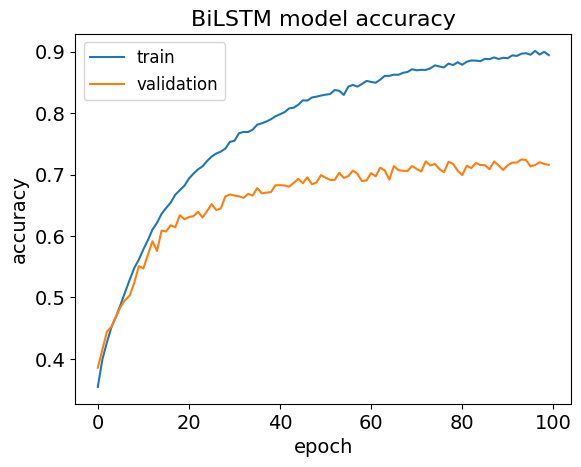

In [27]:
# summarize history for accuracy
plt.plot(bilstm_history['accuracy'])
plt.plot(bilstm_history['val_accuracy'])
plt.title('BiLSTM model accuracy', fontsize=16)
plt.ylabel('accuracy', fontsize=14)
plt.xlabel('epoch', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(['train', 'validation'], loc='upper left', fontsize=12)
plt.show()

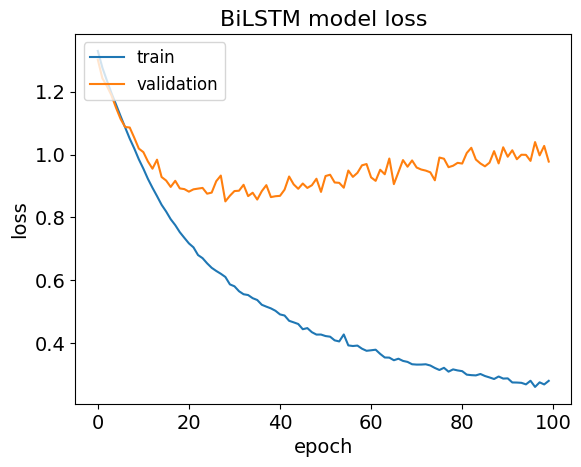

In [28]:
# summarize history for loss
plt.plot(bilstm_history['loss'])
plt.plot(bilstm_history['val_loss'])
plt.title('BiLSTM model loss', fontsize=16)
plt.ylabel('loss', fontsize=14)
plt.xlabel('epoch', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(['train', 'validation'], loc='upper left', fontsize=12)
plt.show()

124/124 [==============================] - 3s 9ms/step


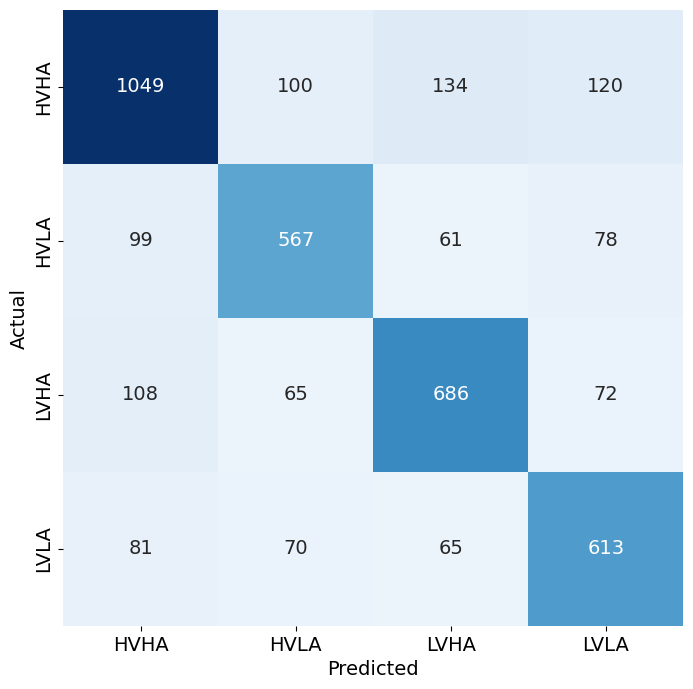

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.78      0.75      0.77      1403
           1       0.71      0.70      0.71       805
           2       0.73      0.74      0.73       931
           3       0.69      0.74      0.72       829

    accuracy                           0.73      3968
   macro avg       0.73      0.73      0.73      3968
weighted avg       0.74      0.73      0.74      3968



In [29]:
import seaborn as sns
class_names = ['HVHA', 'HVLA', 'LVHA', 'LVLA']

y_pred = bilstm_model.predict(x_test)

y_predict = []

for i in range(len(y_pred)):
    y_predict.append(np.argmax(y_pred[i]))

y_predict = np.array(y_predict)
yt_test = np.argmax(y_test, axis=1)

cm = confusion_matrix(yt_test, y_predict)
clr = classification_report(yt_test, y_predict)

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues', annot_kws={"size":14})
plt.xticks(np.arange(4) + 0.5, class_names, fontsize=14)
plt.yticks(np.arange(4) + 0.5, class_names, fontsize=14)
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("Actual", fontsize=14)
# plt.title("Confusion Matrix for GRU Model")
plt.show()

print("Classification Report:\n----------------------\n", clr)